In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\cleaned_data sets\merged_data.csv", low_memory=False)

In [3]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018,1,-1,...,47813,barreiras,BA,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018,1,-1,...,75265,vianopolis,GO,1,credit_card,3,179.12,14840,guariba,SP


# 1.How does the weight of a product affect our shipping costs?

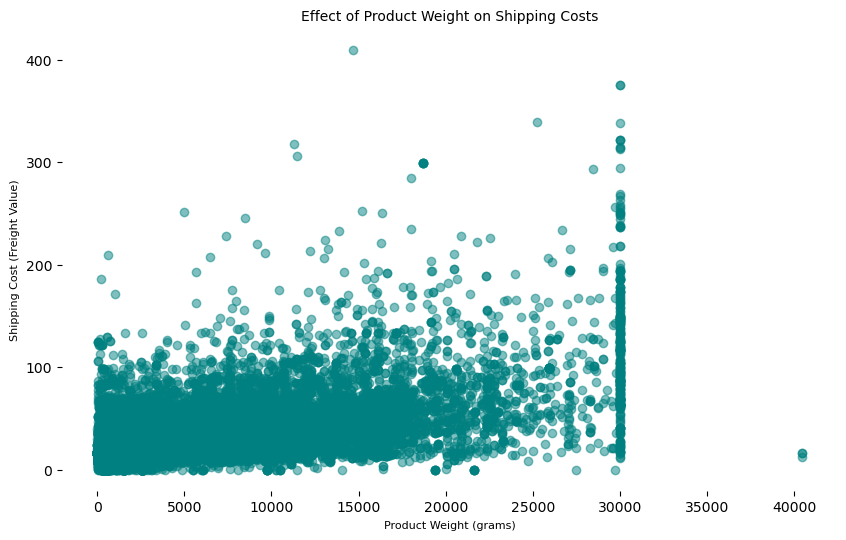

In [4]:
# Scatter plot to explore the relationship between product weight and shipping cost
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting weight (in grams) against freight value (shipping cost)
ax.scatter(df['product_weight_g'], df['freight_value'], color='teal', alpha=0.5)

# Adding labels and title
ax.set_title('Effect of Product Weight on Shipping Costs', fontsize=10)
ax.set_xlabel('Product Weight (grams)', fontsize=8)
ax.set_ylabel('Shipping Cost (Freight Value)', fontsize=8)

# Professional formatting: Remove spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the chart as PNG
plt.savefig('weight_vs_shipping_cost.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


# 2. Which products or categories are causing the most shipping delays?

Categories Causing the Most Shipping Delays:
             product_category_name_eng  delay_days
3               arts_and_craftmanship   -6.791667
41  furniture_mattress_and_upholstery   -7.512195
46                     home_comfort_2   -8.483871
47                       home_confort   -9.848421
4                               audio  -10.281579
..                                ...         ...
70                       unknown name  -15.907168
52                         la_cuisine  -16.500000
11                  cds_dvds_musicals  -16.857143
29          fashion_childrens_clothes  -16.875000
61              security_and_services  -17.000000

[72 rows x 2 columns]


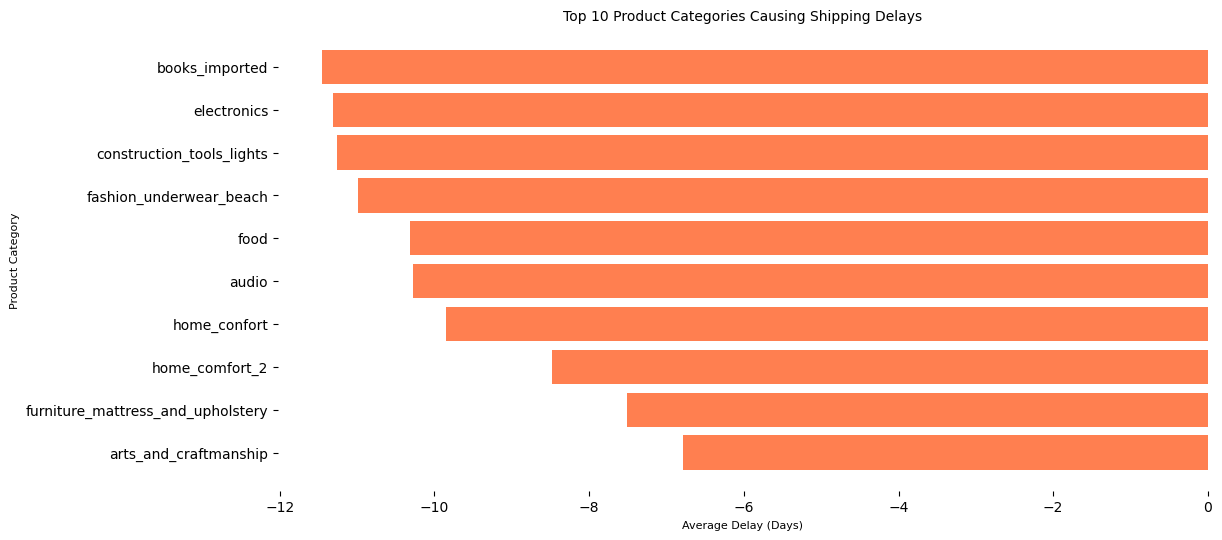

In [5]:
# Convert date columns to datetime format
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Calculate the delay in days
df['delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Group by product category and calculate average delay
category_delay = df.groupby('product_category_name_eng')['delay_days'].mean().reset_index()

# Sort by average delay to find categories with the most delays
category_delay = category_delay.sort_values(by='delay_days', ascending=False)

# Display the categories with the most delays
print("Categories Causing the Most Shipping Delays:\n", category_delay)

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(category_delay['product_category_name_eng'].head(10), category_delay['delay_days'].head(10), color='coral')

# Add labels and title
ax.set_title('Top 10 Product Categories Causing Shipping Delays', fontsize=10)
ax.set_xlabel('Average Delay (Days)', fontsize=8)
ax.set_ylabel('Product Category', fontsize=8)

# Professional formatting: Remove spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the chart as PNG
plt.savefig('categories_causing_shipping_delays.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


# 3. How close are we cutting it with our shipping deadlines?

Shipping Deadline Adherence Summary:
   order_status     count        mean         std     min    25%    50%   75%  \
0     approved       3.0   -7.333333    5.773503   -14.0   -9.0   -4.0  -4.0   
1     canceled     745.0  -10.320805  120.033275 -1057.0  -10.0   -7.0  -5.0   
2      created       5.0  -46.200000   36.072150   -80.0  -62.0  -52.0 -52.0   
3    delivered  115038.0    5.389715   10.339440 -1036.0    0.0    4.0   8.0   
4     invoiced     373.0  -11.319035   34.609924  -477.0  -10.0   -7.0  -6.0   
5   processing     375.0  -10.896000   10.350921  -149.0  -13.0   -8.0  -7.0   
6      shipped    1245.0   -8.632932   32.758461 -1057.0   -8.0   -7.0  -6.0   
7  unavailable     650.0 -119.126154  136.300932  -477.0 -205.0 -105.0 -33.0   

     max  
0   -4.0  
1  265.0  
2   15.0  
3  205.0  
4   -3.0  
5   -3.0  
6   -3.0  
7  208.0  


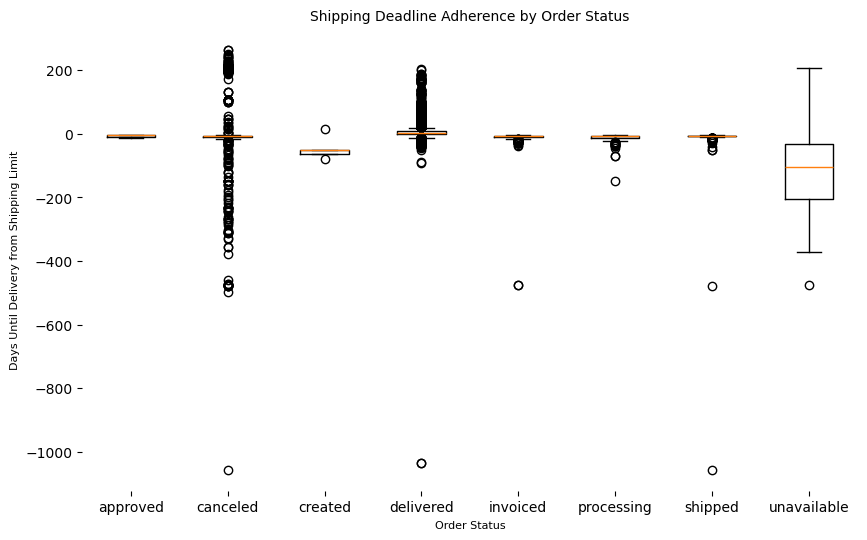

In [6]:
# Convert relevant date columns to datetime format
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Calculate the days until delivery from the shipping limit date
df['deadline_difference'] = (df['order_delivered_customer_date'] - df['shipping_limit_date']).dt.days

# Group by order status to analyze how often deadlines are met or missed
deadline_status = df.groupby('order_status')['deadline_difference'].describe().reset_index()

# Display the summary of deadlines adherence
print("Shipping Deadline Adherence Summary:\n", deadline_status)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot to visualize deadline differences by order status
ax.boxplot([df[df['order_status'] == status]['deadline_difference'] for status in deadline_status['order_status']],
           labels=deadline_status['order_status'])

# Add labels and title
ax.set_title('Shipping Deadline Adherence by Order Status', fontsize=10)
ax.set_ylabel('Days Until Delivery from Shipping Limit', fontsize=8)
ax.set_xlabel('Order Status', fontsize=8)

# Professional formatting: Remove spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the chart as PNG
plt.savefig('shipping_deadline_adherence.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
